In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/candy/candy-data.csv


In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# loading the dataset
df=pd.read_csv('/kaggle/input/candy/candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
df.shape

(85, 13)

In [5]:
# dropping the columns
df.drop(columns='competitorname',inplace=True)

In [6]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [7]:
# calculation of correlation
df.corrwith(df['pricepercent'])

chocolate           0.504675
fruity             -0.430969
caramel             0.254327
peanutyalmondy      0.309153
nougat              0.153196
crispedricewafer    0.328265
hard               -0.244365
bar                 0.518407
pluribus           -0.220794
sugarpercent        0.329706
pricepercent        1.000000
winpercent          0.345325
dtype: float64

In [8]:
# selecting the columns for x and y
x=df[['chocolate','caramel','peanutyalmondy','nougat','crispedricewafer','bar','sugarpercent']]
y=df['winpercent']

In [9]:
# splitting the x and y into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
# importing the linear regression model

from sklearn.linear_model import LinearRegression
model=LinearRegression()

# model fitting
model.fit(x_train,y_train)


LinearRegression()

In [11]:
# model prediction
y_pred=model.predict(x_test)

In [12]:
# accuracy
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score",r2_score(y_test,y_pred))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_score 0.15180761890249161
Mean Squared Error: 170.04274448445625


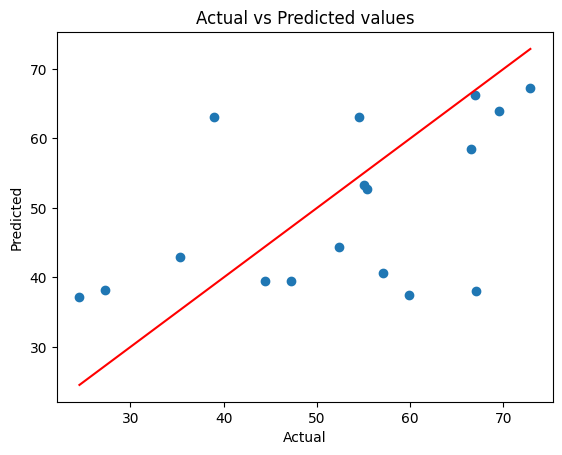

In [13]:
# scatterplot
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()